In [1]:
using Pkg
Pkg.activate(".")

In [3]:
using Plots, OrdinaryDiffEq

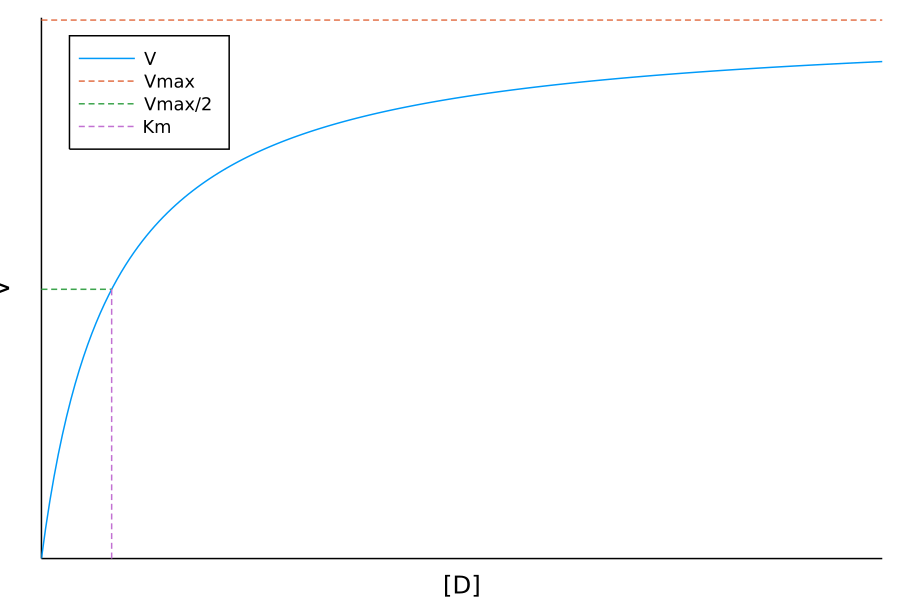

In [4]:
MM(d; Vmax = 45.6, Km = 16.7) = Vmax*d/(Km + d)
doses = 0:1:200
Vmax = 45.6
Km = 16.7
plot(MM, doses, label = "V", xlims = [0, 500], ylims = [0, Vmax + 0.2])
xlabel!("[D]")
ylabel!("V")
xlims!((0, 200))
ylims!((0, Vmax + 0.2))
plot!([0, 500], [Vmax, Vmax]; line = :dash, label = "Vmax", legend = :topleft,ticks = false, dpi = 150)
plot!([0, Km], [Vmax/2, Vmax/2]; line = :dash,  label = "Vmax/2")
plot!([Km, Km], [0, Vmax/2]; line = :dash, label = "Km")

In [5]:
savefig("./Figures/MichelisMenten.png")

In [7]:
Ka = 0.07 #h^-1
Vmax = 0.22 #mmol/(L*h)
Km = 250 #mmol/L

function dCdt(du, u, p, t)
    Ka, Vmax, Km = p
    du[1] = -Ka*u[1]
    du[2] = Ka*u[1] - Vmax*u[2]#/(Km + u[2]) 
end

dCdt (generic function with 1 method)

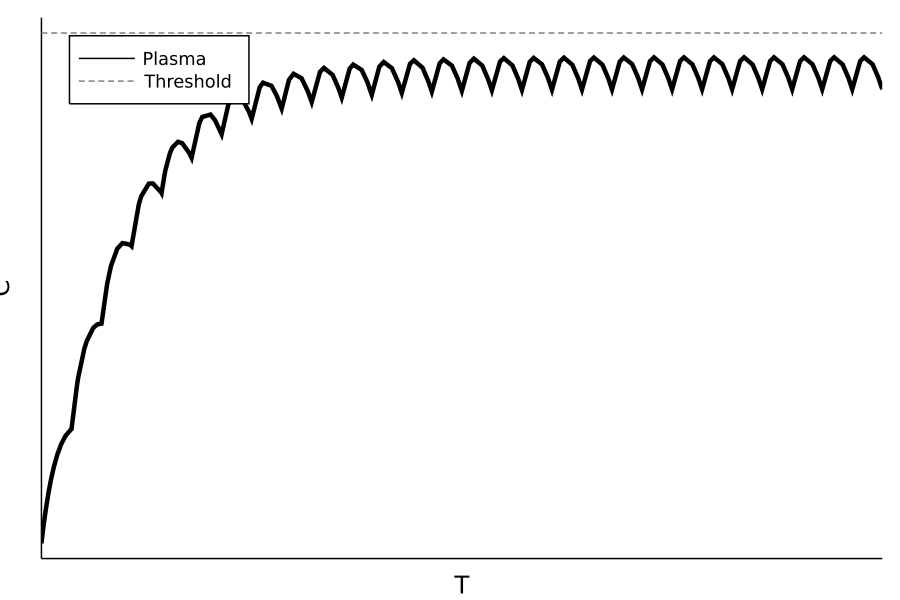

In [8]:
dosetimes = 0:6:168 # we will dose every 6 hours 
condition(u,t,integrator) = t ∈ dosetimes
affect!(integrator) = integrator.u[1] += 150 #add this concentration to the GI compartment
cb = DiscreteCallback(condition,affect!)
tspan = (0, 168) #Time range
u0 = [150, 0] #initial concentrations in GI and Plasma compartment respectively
p = [Ka, Vmax, Km]
prob = ODEProblem(dCdt, u0, tspan, p)
sol = solve(prob,Rosenbrock23(),callback=cb,tstops=dosetimes)
plot(sol.t, sol[2,:]; xlabel = "T", ylabel = "C", label = "Plasma", legend = :topleft, dpi = 150, ticks = false, color = :black, width = 3, xlim = tspan)
thresh = maximum(sol[2, :])*1.05
plot!([0,168], [thresh, thresh], label = "Threshold", color = :gray, line = :dash)

In [9]:
savefig("Figures/IntroPlot.png")

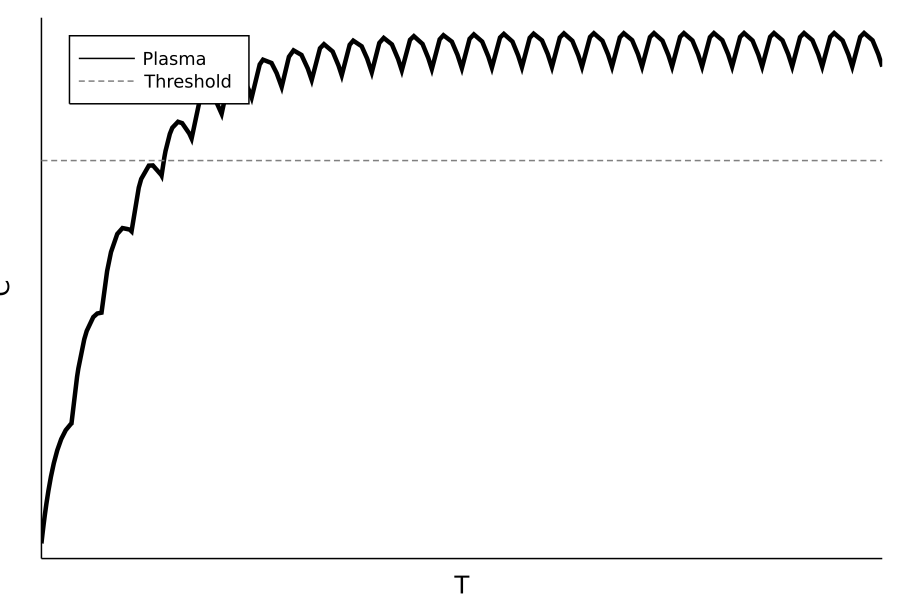

In [10]:
dosetimes = 0:6:168 # we will dose every 6 hours 
condition(u,t,integrator) = t ∈ dosetimes
affect!(integrator) = integrator.u[1] += 150 
cb = DiscreteCallback(condition,affect!)
tspan = (0, 168)
u0 = [150, 0]
p = [Ka, Vmax, Km]
prob = ODEProblem(dCdt, u0, tspan, p)
sol = solve(prob,Rosenbrock23(),callback=cb,tstops=dosetimes)
plot(sol.t, sol[2,:]; xlabel = "T", ylabel = "C", label = "Plasma", legend = :topleft, dpi = 150, ticks = false, color = :black, width = 3, xlim = tspan)
thresh = maximum(sol[2, :])*0.75
plot!([0,168], [thresh, thresh], label = "Threshold", color = :gray, line = :dash)

In [11]:
savefig("Figures/PlotA1.png")

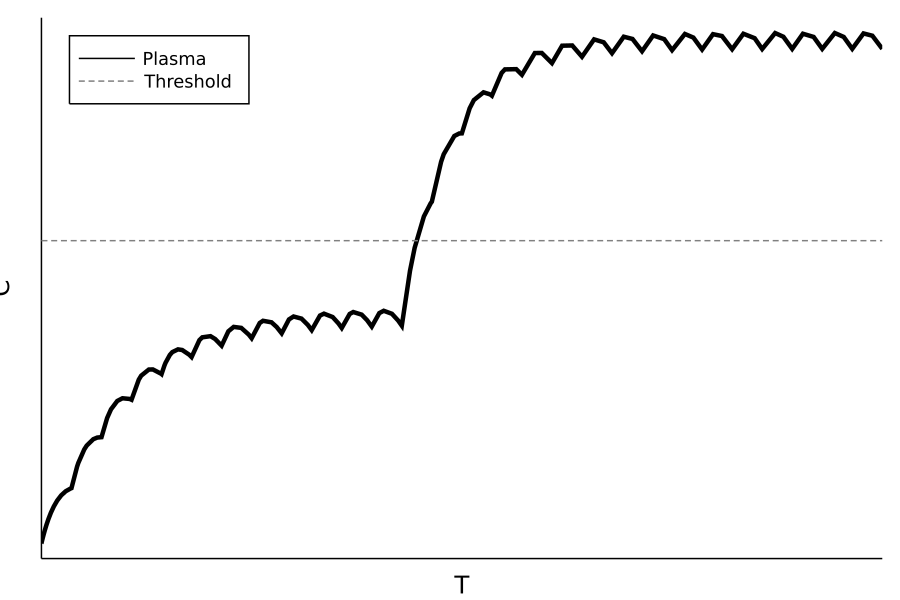

In [12]:
dosetimes = 0:6:168 # we will dose every 4 hours 
condition1(u,t,integrator) = t ∈ dosetimes
affect1!(integrator) = integrator.u[1] += 150
cb1 = DiscreteCallback(condition1,affect1!)
condition2(u,t,integrator) = t ∈ [72]
affect2!(integrator) = integrator.p[2] = 0.1 #Reduce Vmax of elimination term
cb2 = DiscreteCallback(condition2,affect2!)
cb = CallbackSet(cb1, cb2)
tspan = (0, 168)
u0 = [150, 0]
p = [Ka, Vmax, Km]
prob = ODEProblem(dCdt, u0, tspan, p)
sol = solve(prob,Rosenbrock23(),callback=cb,tstops=dosetimes)
plot(sol.t, sol[2,:]; xlabel = "T", ylabel = "C", label = "Plasma", legend = :topleft, dpi = 150, ticks = false, color = :black, width = 3, xlim = tspan)
plot!([0,168], [150, 150], label = "Threshold", color = :gray, line = :dash)

In [13]:
savefig("Figures/PlotA2.png")

In [14]:
Ka = 0.07 #h^-1
Vmax = 0.2 #mmol/(L*h)
Km = 250 #mmol/L
Ke = 0.75

function dCdt(du, u, p, t)
    Ka, Vmax, Km, Ke = p
    du[1] = -Ka*u[1]
    du[2] = Ka*u[1] - Vmax*u[2]
    du[3] = Vmax*u[2]  - Ke*u[3]
end

dCdt (generic function with 1 method)

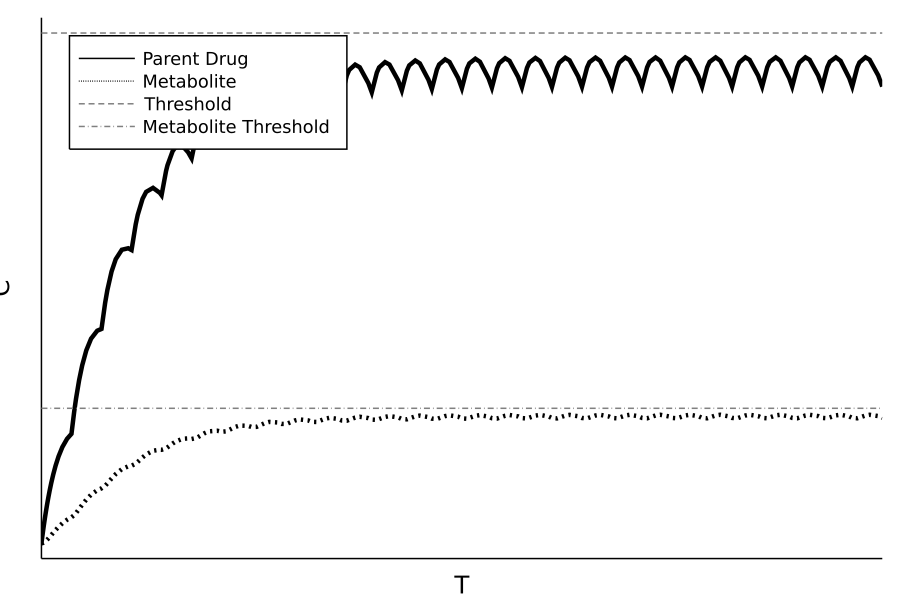

In [15]:
dosetimes = 0:6:168 # we will dose every 4 hours 
prob = ODEProblem(dCdt, u0, tspan, p)
condition(u,t,integrator) = t ∈ dosetimes
affect!(integrator) = integrator.u[1] += 150 
cb = DiscreteCallback(condition,affect!)
p = [Ka, Vmax, Km, Ke]
u0 = [150, 0, 0]
tspan = (0 , 168)
prob = ODEProblem(dCdt, u0, tspan, p)
sol = solve(prob,Rosenbrock23(),callback=cb,tstops=dosetimes)
plot(sol.t, sol[2,:]; xlabel = "T", ylabel = "C", labels = "Parent Drug", legend = :topleft, dpi = 150, ticks = false, color = :black, width = 3, xlim = tspan)
plot!(sol.t, sol[3,:]; xlabel = "T", ylabel = "C", labels = "Metabolite", legend = :topleft, line = :dot, color = :black, width = 3)
thresh = maximum(sol[2, :])*1.05
thresh2 = maximum(sol[3, :])*1.05
plot!([0,168], [thresh, thresh], label = "Threshold", color = :gray, line = :dash)
plot!([0,168], [thresh2, thresh2], label = "Metabolite Threshold", color = :gray, line = :dashdot)

In [16]:
savefig("./Figures/PlotB1.png")

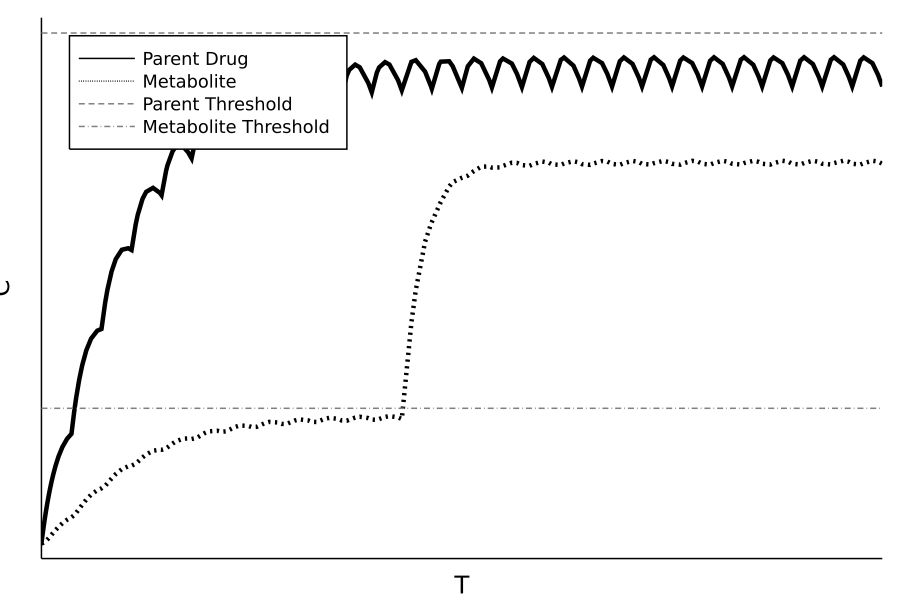

In [17]:
dosetimes = 0:6:168 # we will dose every 4 hours 
condition1(u,t,integrator) = t ∈ dosetimes
affect1!(integrator) = integrator.u[1] += 150
cb1 = DiscreteCallback(condition1,affect1!)
condition2(u,t,integrator) = t ∈ [72]
affect2!(integrator) = integrator.p[4] = 0.25 #Reduce metabolite elimination term
cb2 = DiscreteCallback(condition2,affect2!)
cb = CallbackSet(cb1, cb2)
tspan = (0, 168)
u0 = [150, 0, 0]
p = [Ka, Vmax, Km, Ke]
prob = ODEProblem(dCdt, u0, tspan, p)
sol = solve(prob,Rosenbrock23(),callback=cb,tstops=dosetimes)
plot(sol.t, sol[2,:]; xlabel = "T", ylabel = "C", labels = "Parent Drug", legend = :topleft, dpi = 150, ticks = false, color = :black, width = 3, xlim = tspan)
plot!(sol.t, sol[3,:]; xlabel = "T", ylabel = "C", labels = "Metabolite", legend = :topleft, line = :dot, color = :black, width = 3)
plot!([0,168], [thresh, thresh], label = "Parent Threshold", color = :gray, line = :dash)
plot!([0,168], [thresh2, thresh2], label = "Metabolite Threshold", color = :gray, line = :dashdot)

In [18]:
savefig("./Figures/PlotB2.png")

In [19]:
Ka = 0.15 #h^-1
Vmax = 50 #mmol/(L*h)
Km = 250 #mmol/L

function dCdt(du, u, p, t)
    Ka, Vmax, Km = p
    du[1] = -Ka*u[1]
    du[2] = Ka*u[1] - Vmax*u[2]/(Km + u[2]) 
end

dCdt (generic function with 1 method)

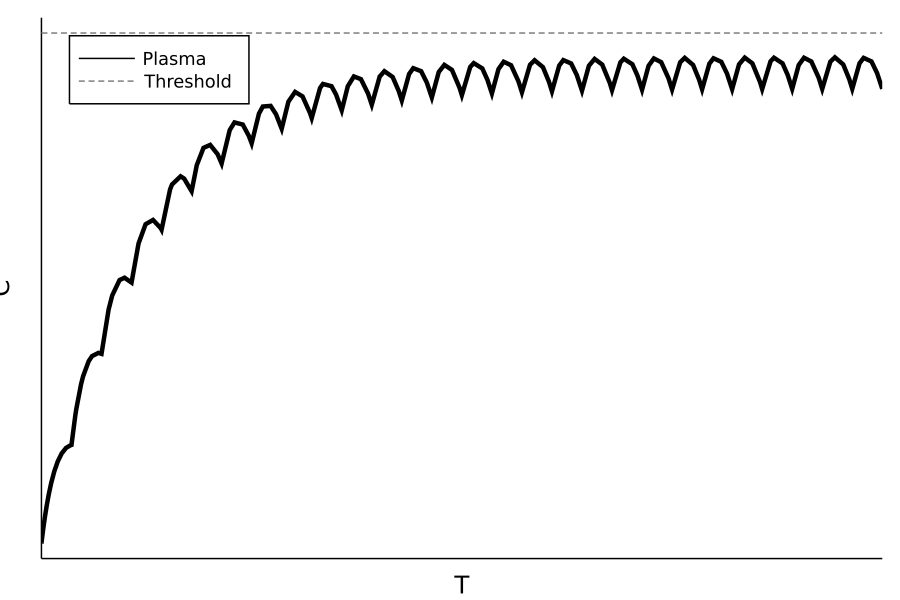

In [20]:
dosetimes = 0:6:168 # we will dose every 6 hours 
condition(u,t,integrator) = t ∈ dosetimes
affect!(integrator) = integrator.u[1] += 150 #add this concentration to the GI compartment
cb = DiscreteCallback(condition,affect!)
tspan = (0, 168) #Time range
u0 = [150, 0] #initial concentrations in GI and Plasma compartment respectively
p = [Ka, Vmax, Km]
prob = ODEProblem(dCdt, u0, tspan, p)
sol = solve(prob,Rosenbrock23(),callback=cb,tstops=dosetimes)
plot(sol.t, sol[2,:]; xlabel = "T", ylabel = "C", label = "Plasma", legend = :topleft, dpi = 150, ticks = false, color = :black, width = 3, xlim = tspan)
thresh = maximum(sol[2, :])*1.05
plot!([0,168], [thresh, thresh], label = "Threshold", color = :gray, line = :dash)

In [21]:
savefig("./Figures/PlotC1.png")

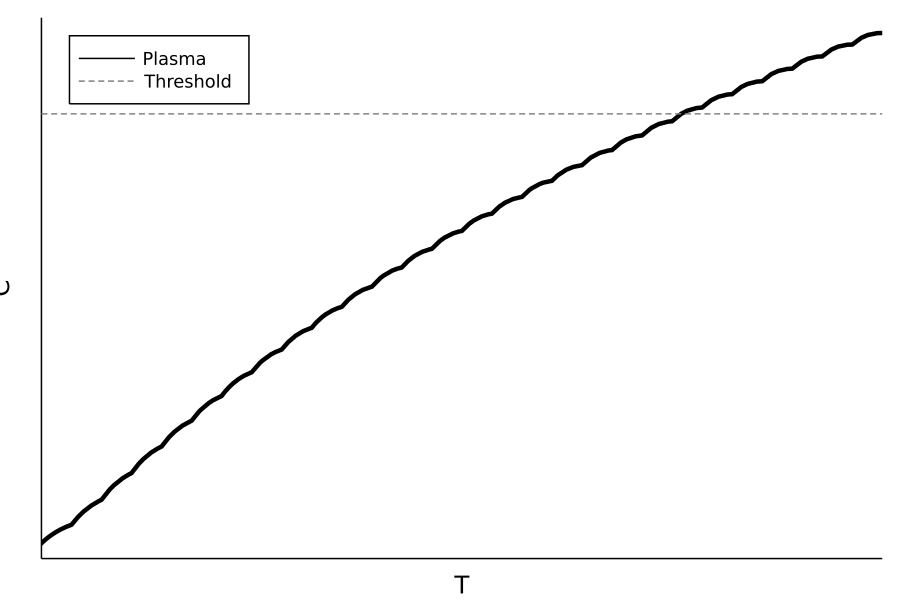

In [22]:
Km = 5000
dosetimes = 0:6:168 # we will dose every 6 hours 
condition(u,t,integrator) = t ∈ dosetimes
affect!(integrator) = integrator.u[1] += 150 #add this concentration to the GI compartment
cb = DiscreteCallback(condition,affect!)
tspan = (0, 168) #Time range
u0 = [150, 0] #initial concentrations in GI and Plasma compartment respectively
p = [Ka, Vmax, Km]
prob = ODEProblem(dCdt, u0, tspan, p)
sol = solve(prob,Rosenbrock23(),callback=cb,tstops=dosetimes)
plot(sol.t, sol[2,:]; xlabel = "T", ylabel = "C", label = "Plasma", legend = :topleft, dpi = 150, ticks = false, color = :black, width = 3, xlim = tspan)
plot!([0,168], [2000, 2000], label = "Threshold", color = :gray, line = :dash)

In [23]:
savefig("./Figures/PlotC2.png")

In [24]:
Ka = 0.07 #h^-1
Vmax = 0.2 #mmol/(L*h)
Km = 250 #mmol/L

function dCdt(du, u, p, t)
    Ka, Vmax, Km = p
    du[1] = -Ka*u[1]
    du[2] = Ka*u[1] - Vmax*u[2]#/(Km + u[2]) 
end

dCdt (generic function with 1 method)

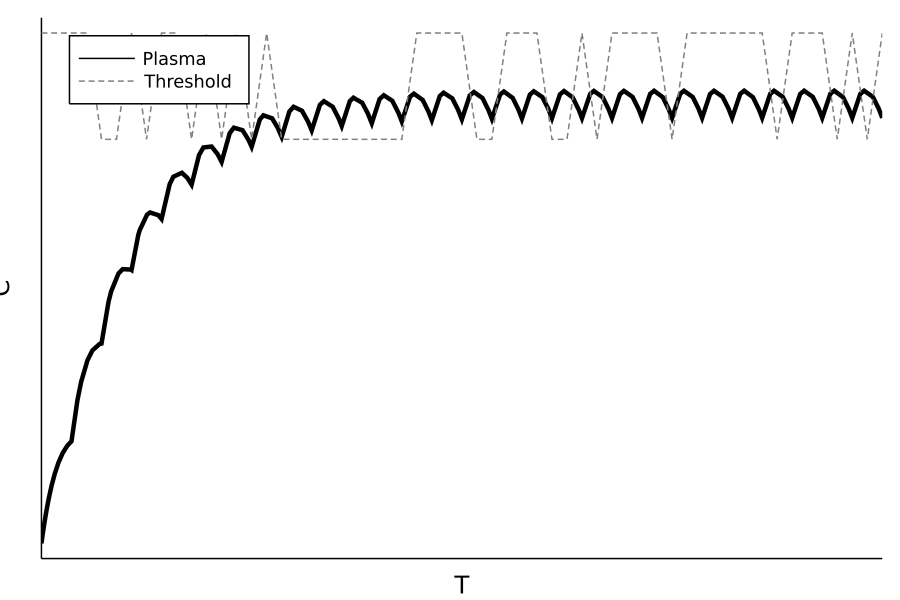

In [25]:
#Drawing this
Vmax = 0.2
dosetimes = 0:6:168 # we will dose every 6 hours 
condition(u,t,integrator) = t ∈ dosetimes
affect!(integrator) = integrator.u[1] += 150 #add this concentration to the GI compartment
cb = DiscreteCallback(condition,affect!)
tspan = (0, 168) #Time range
u0 = [150, 0] #initial concentrations in GI and Plasma compartment respectively
p = [Ka, Vmax, Km]
prob = ODEProblem(dCdt, u0, tspan, p)
sol = solve(prob,Rosenbrock23(),callback=cb,tstops=dosetimes)
plot(sol.t, sol[2,:]; xlabel = "T", ylabel = "C", label = "Plasma", legend = :topleft, dpi = 150, ticks = false, color = :black, width = 3, xlim = tspan)
thresh = maximum(sol[2, :])*1.01
plot!(0:3:168, [thresh+rand((-1,1))*15 for i in 0:3:168], label = "Threshold", color = :gray, line = :dash)

In [26]:
savefig("./Figures/PlotE1.png")

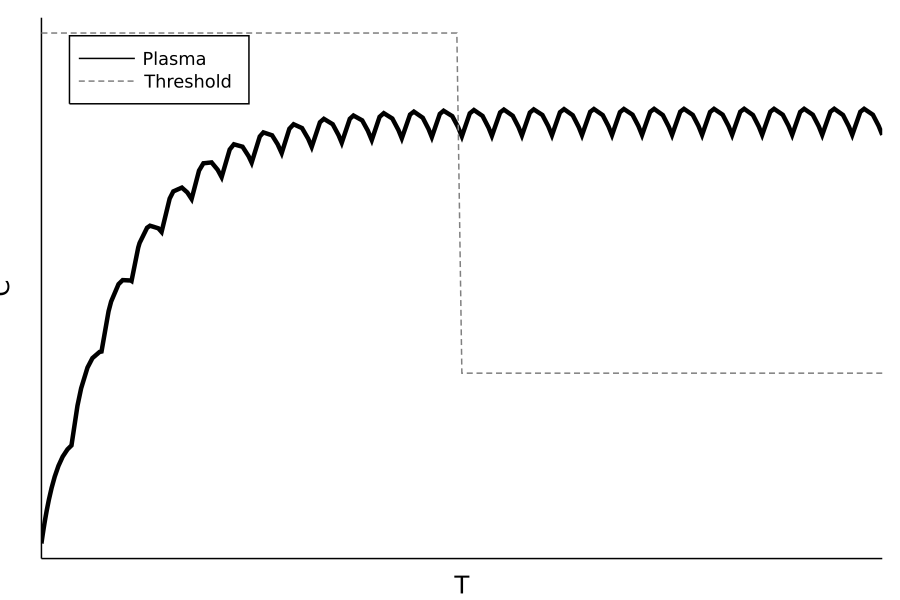

In [27]:
Vmax = 0.2
dosetimes = 0:6:168 # we will dose every 6 hours 
condition(u,t,integrator) = t ∈ dosetimes
affect!(integrator) = integrator.u[1] += 150 #add this concentration to the GI compartment
cb = DiscreteCallback(condition,affect!)
tspan = (0, 168) #Time range
u0 = [150, 0] #initial concentrations in GI and Plasma compartment respectively
p = [Ka, Vmax, Km]
prob = ODEProblem(dCdt, u0, tspan, p)
sol = solve(prob,Rosenbrock23(),callback=cb,tstops=dosetimes)
plot(sol.t, sol[2,:]; xlabel = "T", ylabel = "C", label = "Plasma", legend = :topleft, dpi = 150, ticks = false, color = :black, width = 3, xlim = tspan)
plot!(0:168, [i < maximum(sol.t)/2 ? 150 : 50 for i in 0:168], label = "Threshold", color = :gray, line = :dash)

In [28]:
savefig("./Figures/PlotF1.png")

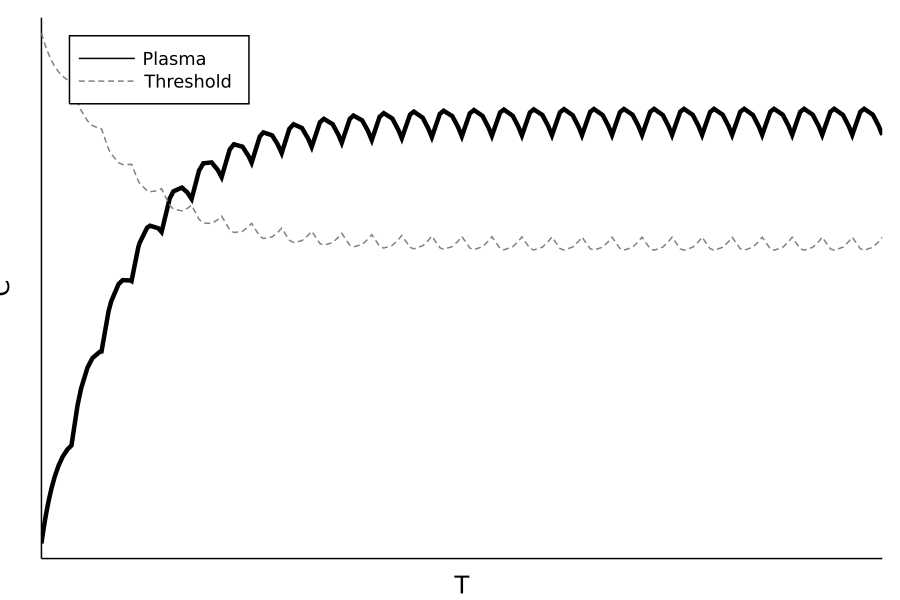

In [29]:
Vmax = 0.2
dosetimes = 0:6:168 # we will dose every 6 hours 
condition(u,t,integrator) = t ∈ dosetimes
affect!(integrator) = integrator.u[1] += 150 #add this concentration to the GI compartment
cb = DiscreteCallback(condition,affect!)
tspan = (0, 168) #Time range
u0 = [150, 0] #initial concentrations in GI and Plasma compartment respectively
p = [Ka, Vmax, Km]
prob = ODEProblem(dCdt, u0, tspan, p)
sol = solve(prob,Rosenbrock23(),callback=cb,tstops=dosetimes)
f(x) = -0.5*x + 150
plot(sol.t, sol[2,:]; xlabel = "T", ylabel = "C", label = "Plasma", legend = :topleft, dpi = 150, ticks = false, color = :black, width = 3, xlim = tspan)
plot!(sol.t, f.(sol[2,:]), label = "Threshold", color = :gray, line = :dash)

In [30]:
savefig("./Figures/PlotG1.png")